In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#load dataset
carData= pd.read_csv("us-dealers-used.csv")

#shape of dataset
carData.shape

#viewing first 5 rows
carData.head()

#checking for missing values
carData.isna().sum()

/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/3979177757.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  carData= pd.read_csv("us-dealers-used.csv")


id                   0
vin                  0
price           656779
miles            67290
stock_no        172288
year               160
make                 0
model             8040
trim             15169
body_type        27978
vehicle_type     38366
drivetrain       15921
transmission     13600
fuel_type        45956
engine_size     103266
engine_block    107110
seller_name      11111
street           31145
city             11404
state            11414
zip              11647
dtype: int64

In [3]:
#dropping unnecessary columns
columnsToDrop = ['id', 'stock_no', 'seller_name', 'street']
carData_1 = carData.drop(columns = columnsToDrop)

#viewing the updated dataset
carData_1.head()

,vin,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,city,state,zip
0,1GCWGFCF3F1284719,20998.0,115879.0,2015.0,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,4.8,V,Ellicott City,MD,21043
1,WBY7Z8C59JVB87514,27921.0,7339.0,2018.0,BMW,i3,s,Hatchback,Car,RWD,Automatic,Electric / Premium Unleaded,0.6,I,Pompano Beach,FL,33064
2,ML32F4FJ2JHF10325,11055.0,39798.0,2018.0,Mitsubishi,Mirage G4,SE,Sedan,Car,FWD,Automatic,Unleaded,1.2,I,West Bend,WI,53095
3,1GCPTEE15K1291189,52997.0,28568.0,2019.0,Chevrolet,Colorado,ZR2,Pickup,Truck,4WD,Automatic,Diesel,2.8,I,Layton,UT,84041
4,1G2AL18F087312093,NaN,188485.0,2008.0,Pontiac,G5,Base,Coupe,Car,FWD,Automatic,Unleaded,2.2,I,Saint Peters,MO,63376


In [4]:
#filtering data for cars manufactured between 2013 and 2022
# This step narrows down the dataset to include only cars from the last decade
carData_2 = carData_1[carData_1['year'].between(2013, 2022)].copy()
print(carData_2['year'].min(), carData_2['year'].max())
print(carData_2.shape)

2013.0 2022.0
(6208179, 17)


In [5]:
#checking for missing values in the filtered dataset
carData_2.isna().sum()

vin                  0
price           467562
miles            44818
year                 0
make                 0
model             2532
trim              5815
body_type        11523
vehicle_type     17243
drivetrain        5965
transmission      5395
fuel_type        19889
engine_size      61652
engine_block     63795
city             10454
state            10460
zip              10555
dtype: int64

In [6]:
#checking the skewness of numerical features
carData_2.select_dtypes(include=['number']).skew()

price          7.476061
miles          2.325959
year          -0.583257
engine_size    1.020749
dtype: float64

In [7]:
#dropping rows with missing values
CarOmissionData= carData_2.dropna()
CarOmissionData.shape

(5649563, 17)

In [8]:
#datatype conversions
CarOmissionData['price'] = pd.to_numeric(CarOmissionData['price'], errors='coerce')
CarOmissionData['make']  = CarOmissionData['make'].astype(str).str.strip()
CarOmissionData['model'] = CarOmissionData['model'].astype(str).str.strip()
CarOmissionData['year']  = pd.to_numeric(CarOmissionData['year'], errors='coerce').fillna(0).astype(int)

/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/3623524460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarOmissionData['price'] = pd.to_numeric(CarOmissionData['price'], errors='coerce')
/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/3623524460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarOmissionData['make']  = CarOmissionData['make'].astype(str).str.strip()
/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/3623524460.py:4: SettingWithCopyWarnin

In [9]:
#creating a copy of the cleaned dataset for feature engineering
car_df = CarOmissionData.copy().reset_index()

In [10]:
# Log Transformations (Handle Skewness)
car_df['log_price'] = np.log1p(car_df['price'])

car_df['log_miles'] = np.log1p(car_df['miles'])

car_df.head()

,index,vin,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,city,state,zip,log_price,log_miles
0,0,1GCWGFCF3F1284719,20998.0,115879.0,2015,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,4.8,V,Ellicott City,MD,21043,9.952230,11.660310
1,1,WBY7Z8C59JVB87514,27921.0,7339.0,2018,BMW,i3,s,Hatchback,Car,RWD,Automatic,Electric / Premium Unleaded,0.6,I,Pompano Beach,FL,33064,10.237170,8.901094
2,2,ML32F4FJ2JHF10325,11055.0,39798.0,2018,Mitsubishi,Mirage G4,SE,Sedan,Car,FWD,Automatic,Unleaded,1.2,I,West Bend,WI,53095,9.310729,10.591597
3,3,1GCPTEE15K1291189,52997.0,28568.0,2019,Chevrolet,Colorado,ZR2,Pickup,Truck,4WD,Automatic,Diesel,2.8,I,Layton,UT,84041,10.878009,10.260077
4,8,5YMCY0C08L9D04057,105974.0,9589.0,2020,BMW,X6 M,Base,SUV,Truck,4WD,Automatic,Premium Unleaded,4.4,V,Miami,FL,33137,11.570958,9.168476


In [11]:
# IQR OUTLIER FLAG CREATION FOR PRICE & MILES
# We check for outliers in price and miles using the IQR rule, but we 
# intentionally do NOT remove them for the following domain reasons:
# Used-car markets naturally contain extreme but legitimate values 
# (e.g., luxury cars priced very high, old vehicles with very high mileage).

# ---- Price IQR ----
Q1_price = car_df['price'].quantile(0.25)
Q3_price = car_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_price = Q1_price - 1.5 * IQR_price
upper_price = Q3_price + 1.5 * IQR_price

car_df['price_outlier_flag'] = (
    (car_df['price'] < lower_price) |
    (car_df['price'] > upper_price)
).astype(int)


# ---- Miles IQR ----
Q1_miles = car_df['miles'].quantile(0.25)
Q3_miles = car_df['miles'].quantile(0.75)
IQR_miles = Q3_miles - Q1_miles

lower_miles = Q1_miles - 1.5 * IQR_miles
upper_miles = Q3_miles + 1.5 * IQR_miles

car_df['miles_outlier_flag'] = (
    (car_df['miles'] < lower_miles) |
    (car_df['miles'] > upper_miles)
).astype(int)



In [12]:
# Summary statistics for numeric columns
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,5649563.0,3.559881e+06,2.048648e+06,0.0,1.774890e+06,3.551258e+06,5.327816e+06,7.104303e+06
price,5649563.0,2.964123e+04,1.700268e+04,0.0,1.899900e+04,2.599900e+04,3.644000e+04,1.499996e+06
miles,5649563.0,4.441576e+04,3.368609e+04,0.0,2.080300e+04,3.548300e+04,6.123100e+04,3.000000e+06
year,5649563.0,2.017550e+03,1.931474e+00,2013.0,2.016000e+03,2.018000e+03,2.019000e+03,2.022000e+03
engine_size,5649563.0,3.038041e+00,1.330179e+00,0.6,2.000000e+00,2.500000e+00,3.600000e+00,3.000000e+01
log_price,5649563.0,1.017998e+01,4.756409e-01,0.0,9.852194e+00,1.016585e+01,1.050345e+01,1.422097e+01
log_miles,5649563.0,1.030610e+01,1.238652e+00,0.0,9.942901e+00,1.047684e+01,1.102243e+01,1.491412e+01
price_outlier_flag,5649563.0,3.316982e-02,1.790798e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
miles_outlier_flag,5649563.0,3.049174e-02,1.719360e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


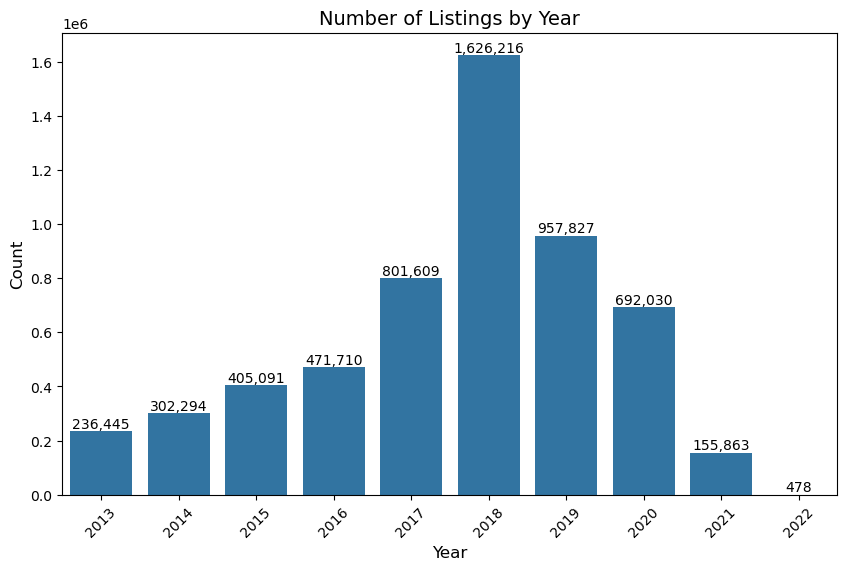

In [13]:
# Count the number of listings for each year
year_counts = car_df['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']

# Bar plot with data labels
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='count', data=year_counts, legend=False)
plt.title("Number of Listings by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

# Add data labels (vectorized)
for i, v in enumerate(year_counts['count']):
    plt.text(i, v + 10000, f"{v:,}", ha='center', fontsize=10)

plt.show()

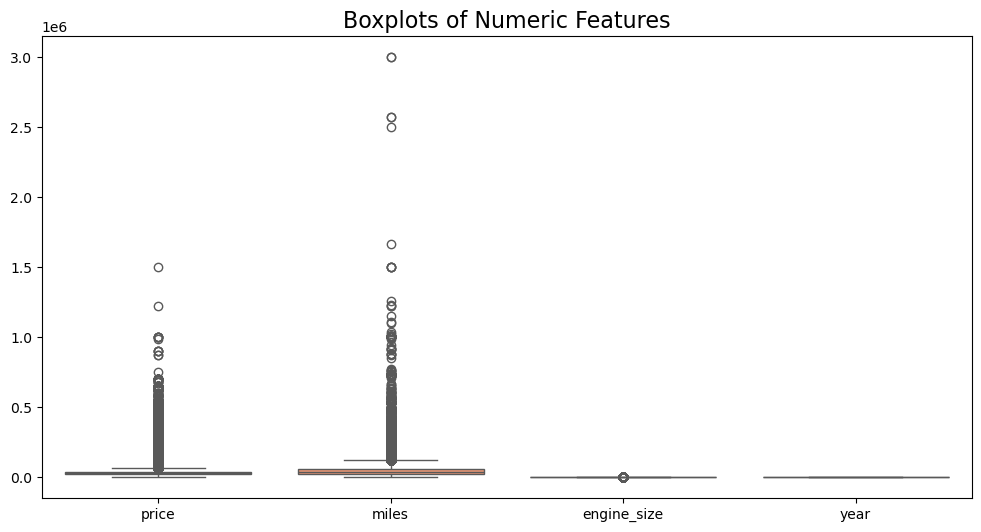

In [14]:
# Boxplots for numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_df[['price', 'miles', 'engine_size', 'year']], palette="Set2")
plt.title("Boxplots of Numeric Features", fontsize=16)
plt.show()

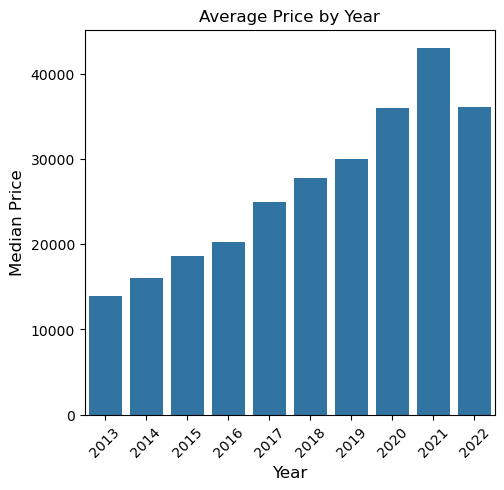

In [15]:
avg_price = car_df.groupby('year')['price'].median().reset_index()
# Visualizations

plt.figure(figsize=(18,5))

# Average Price by Year
plt.subplot(1, 3, 1)
sns.barplot(x='year', y='price', data=avg_price)
plt.title("Average Price by Year", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Price", fontsize=12)
plt.xticks(rotation=45)

plt.show()

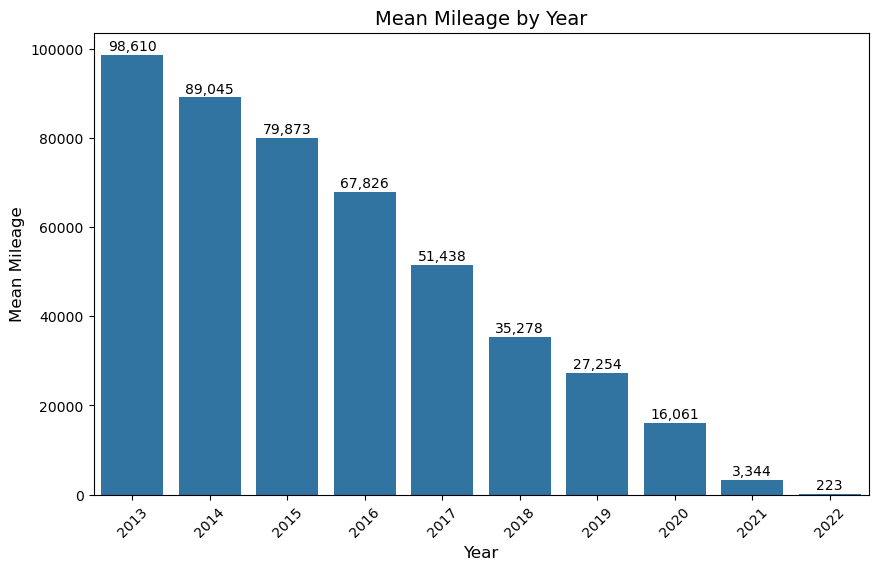

In [16]:
# Calculate mean mileage by year
mean_miles = car_df.groupby('year')['miles'].mean().reset_index()

# Bar plot for mean mileage by year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='miles', data=mean_miles)
plt.title("Mean Mileage by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Mileage", fontsize=12)
plt.xticks(rotation=45)


# Add data labels (vectorized)
for i, v in enumerate(mean_miles['miles']):
    plt.text(i, v + 1000, f"{int(v):,}", ha='center', fontsize=10)    

plt.show()

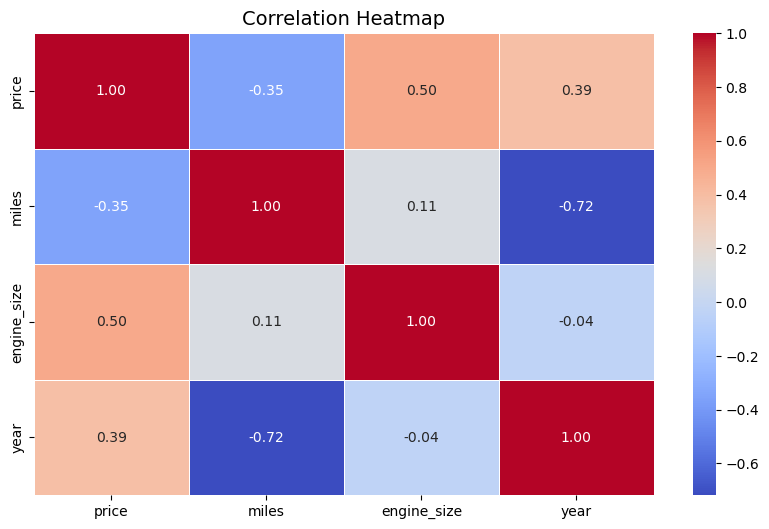

In [17]:
# Correlation matrix
corr_matrix_before_fe = car_df[['price', 'miles', 'engine_size', 'year']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_before_fe, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Feature Engineering 

#### Vehicle Age - depreciation over time


In [18]:
# Vehicle Age- Helps capture depreciation overtime

from datetime import datetime
current_year = datetime.now().year
car_df['vehicle_age'] = current_year - car_df['year']

car_df.head()

,index,vin,price,miles,year,make,model,trim,body_type,vehicle_type,...,engine_size,engine_block,city,state,zip,log_price,log_miles,price_outlier_flag,miles_outlier_flag,vehicle_age
0,0,1GCWGFCF3F1284719,20998.0,115879.0,2015,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,...,4.8,V,Ellicott City,MD,21043,9.952230,11.660310,0,0,10
1,1,WBY7Z8C59JVB87514,27921.0,7339.0,2018,BMW,i3,s,Hatchback,Car,...,0.6,I,Pompano Beach,FL,33064,10.237170,8.901094,0,0,7
2,2,ML32F4FJ2JHF10325,11055.0,39798.0,2018,Mitsubishi,Mirage G4,SE,Sedan,Car,...,1.2,I,West Bend,WI,53095,9.310729,10.591597,0,0,7
3,3,1GCPTEE15K1291189,52997.0,28568.0,2019,Chevrolet,Colorado,ZR2,Pickup,Truck,...,2.8,I,Layton,UT,84041,10.878009,10.260077,0,0,6
4,8,5YMCY0C08L9D04057,105974.0,9589.0,2020,BMW,X6 M,Base,SUV,Truck,...,4.4,V,Miami,FL,33137,11.570958,9.168476,1,0,5


#### Miles per year - shows usage intensity

In [19]:
# Miles per Year (Usage Intensity)- To detect overused or underused cars
car_df['miles_per_year'] = car_df['miles'] / car_df['vehicle_age'].replace(0,1)

car_df.head()

,index,vin,price,miles,year,make,model,trim,body_type,vehicle_type,...,engine_block,city,state,zip,log_price,log_miles,price_outlier_flag,miles_outlier_flag,vehicle_age,miles_per_year
0,0,1GCWGFCF3F1284719,20998.0,115879.0,2015,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,...,V,Ellicott City,MD,21043,9.952230,11.660310,0,0,10,11587.900000
1,1,WBY7Z8C59JVB87514,27921.0,7339.0,2018,BMW,i3,s,Hatchback,Car,...,I,Pompano Beach,FL,33064,10.237170,8.901094,0,0,7,1048.428571
2,2,ML32F4FJ2JHF10325,11055.0,39798.0,2018,Mitsubishi,Mirage G4,SE,Sedan,Car,...,I,West Bend,WI,53095,9.310729,10.591597,0,0,7,5685.428571
3,3,1GCPTEE15K1291189,52997.0,28568.0,2019,Chevrolet,Colorado,ZR2,Pickup,Truck,...,I,Layton,UT,84041,10.878009,10.260077,0,0,6,4761.333333
4,8,5YMCY0C08L9D04057,105974.0,9589.0,2020,BMW,X6 M,Base,SUV,Truck,...,V,Miami,FL,33137,11.570958,9.168476,1,0,5,1917.800000


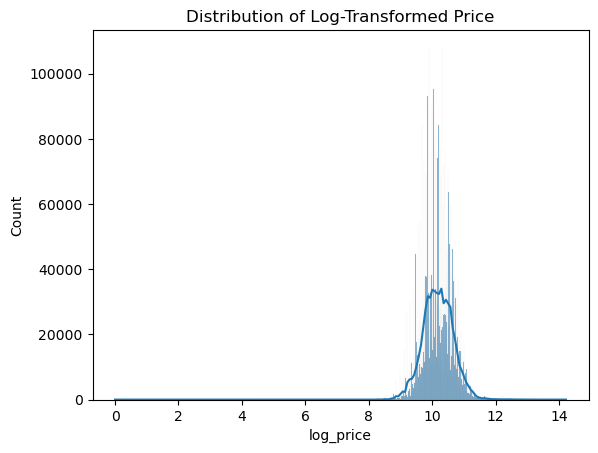

In [20]:
# distribution of Log-transformed price
sns.histplot(car_df['log_price'], kde=True)
plt.title("Distribution of Log-Transformed Price")
plt.show()

#### Segment - grouping similar vehicles to simplify the model

In [21]:
# Unique body types in the dataset
print(car_df['body_type'].unique())

['Cargo Van' 'Hatchback' 'Sedan' 'Pickup' 'SUV' 'Crossover' 'Cutaway'
 'Chassis Cab' 'Convertible' 'Coupe' 'Targa' 'Passenger Van' 'Micro Car'
 'Roadster' 'Wagon' 'Mini Mpv' 'Combi' 'Minivan' 'Car Van'
 'Commercial Wagon']


In [22]:
# Group body types into broader market segments
car_df['segment'] = car_df['body_type'].replace({
    'Sedan': 'Standard',
    'Hatchback': 'Standard',
    'SUV': 'High Value',
    'Crossover': 'High Value',
    'Pickup': 'Utility',
    'Chassis Cab': 'Utility',
    'Cutaway': 'Utility',
    'Coupe': 'Sport',
    'Roadster': 'Sport',
    'Targa': 'Sport',
    'Convertible': 'Luxury',
    'Minivan': 'Van/Minivan',
    'Passenger Van': 'Van/Minivan',
    'Cargo Van': 'Van/Minivan',
    'Mini Mpv': 'Van/Minivan',
    'Combi': 'Van/Minivan',
    'Wagon' : 'Wagon',
    'Commercial Wagon' : 'Wagon',
    'Micro Car' : 'Micro'
}).fillna('Other')

car_df.head()

,index,vin,price,miles,year,make,model,trim,body_type,vehicle_type,...,city,state,zip,log_price,log_miles,price_outlier_flag,miles_outlier_flag,vehicle_age,miles_per_year,segment
0,0,1GCWGFCF3F1284719,20998.0,115879.0,2015,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,...,Ellicott City,MD,21043,9.952230,11.660310,0,0,10,11587.900000,Van/Minivan
1,1,WBY7Z8C59JVB87514,27921.0,7339.0,2018,BMW,i3,s,Hatchback,Car,...,Pompano Beach,FL,33064,10.237170,8.901094,0,0,7,1048.428571,Standard
2,2,ML32F4FJ2JHF10325,11055.0,39798.0,2018,Mitsubishi,Mirage G4,SE,Sedan,Car,...,West Bend,WI,53095,9.310729,10.591597,0,0,7,5685.428571,Standard
3,3,1GCPTEE15K1291189,52997.0,28568.0,2019,Chevrolet,Colorado,ZR2,Pickup,Truck,...,Layton,UT,84041,10.878009,10.260077,0,0,6,4761.333333,Utility
4,8,5YMCY0C08L9D04057,105974.0,9589.0,2020,BMW,X6 M,Base,SUV,Truck,...,Miami,FL,33137,11.570958,9.168476,1,0,5,1917.800000,High Value


#### fuel category - simplifies fuel type for model

In [23]:
# Unique fuel types in the dataset
print(car_df['fuel_type'].unique())

['E85 / Unleaded' 'Electric / Premium Unleaded' 'Unleaded' 'Diesel'
 'Premium Unleaded' 'Premium Unleaded; Unleaded' 'Electric / Unleaded'
 'E85 / Premium Unleaded' 'E85 / Unleaded; Unleaded'
 'Electric / Premium Unleaded; Electric / Unleaded'
 'Electric / Premium Unleaded; Premium Unleaded' 'Electric'
 'E85 / Unleaded; Unleaded / Unleaded' 'Unleaded / Unleaded'
 'Compressed Natural Gas / Unleaded' 'Diesel; Unleaded'
 'Diesel; E85 / Unleaded' 'E85 / Unleaded; Premium Unleaded'
 'Premium Unleaded / Unleaded' 'Compressed Natural Gas' 'E85'
 'Compressed Natural Gas / Lpg']


In [24]:
# Simplify fuel types into broader categories
car_df['fuel_category'] = car_df['fuel_type'].replace({
    'Unleaded' : 'Gasoline',
    'Premium Unleaded' : 'Gasoline',
    'E85 / Unleaded' : 'Gasoline',
    'Diesel' : 'Diesel',
    'Electric / Premium Unleaded' : 'Hybrid',
    'E85 / Premium Unleaded' : 'Gasoline',
    'Electric / Unleaded' : 'Hybrid',
    'Premium Unleaded; Unleaded' : 'Gasoline',
    'E85 / Unleaded; Unleaded / Unleaded' : 'Gasoline',
    'Unleaded / Unleaded' : 'Gasoline',
    'E85 / Unleaded; Premium Unleaded' : 'Gasoline',
    'E85' : 'Gasoline',
    'Diesel; E85 / Unleaded': 'Gasoline',
    'Electric' : 'Hybrid',
    'E85 / Unleaded; Unleaded' : 'Gasoline',
    'Electric / Premium Unleaded; Premium Unleaded'  : 'Hybrid',
    'Diesel; Unleaded' : 'Diesel',
    'Compressed Natural Gas / Unleaded' : 'Other',
    'Premium Unleaded / Unleaded' : 'Gasoline',
    'Compressed Natural Gas' : 'Other',
    'Electric / Premium Unleaded; Electric / Unleaded' : 'Hybrid',
    'Compressed Natural Gas / Lpg' : 'Other'
}).fillna('Other')

In [25]:
# counts of segments and fuel categories
print(car_df['segment'].value_counts())
print(car_df['fuel_category'].value_counts())


segment
High Value     2664346
Standard       1636282
Utility         915859
Sport           185948
Van/Minivan     151805
Wagon            61040
Luxury           33874
Car Van            310
Micro               99
Name: count, dtype: int64
fuel_category
Gasoline    5392196
Diesel       133052
Hybrid       124185
Other           130
Name: count, dtype: int64


In [26]:
# Check Correlations (Numeric Relationship)
corr_matrix_after_fe= car_df[['price','miles','year','engine_size','vehicle_age','miles_per_year']].corr()

corr_matrix_after_fe

,price,miles,year,engine_size,vehicle_age,miles_per_year
price,1.000000,-0.354775,0.386520,0.498876,-0.386520,-0.296514
miles,-0.354775,1.000000,-0.717699,0.111506,0.717699,0.934190
year,0.386520,-0.717699,1.000000,-0.036259,-1.000000,-0.495094
engine_size,0.498876,0.111506,-0.036259,1.000000,0.036259,0.129418
vehicle_age,-0.386520,0.717699,-1.000000,0.036259,1.000000,0.495094
miles_per_year,-0.296514,0.934190,-0.495094,0.129418,0.495094,1.000000


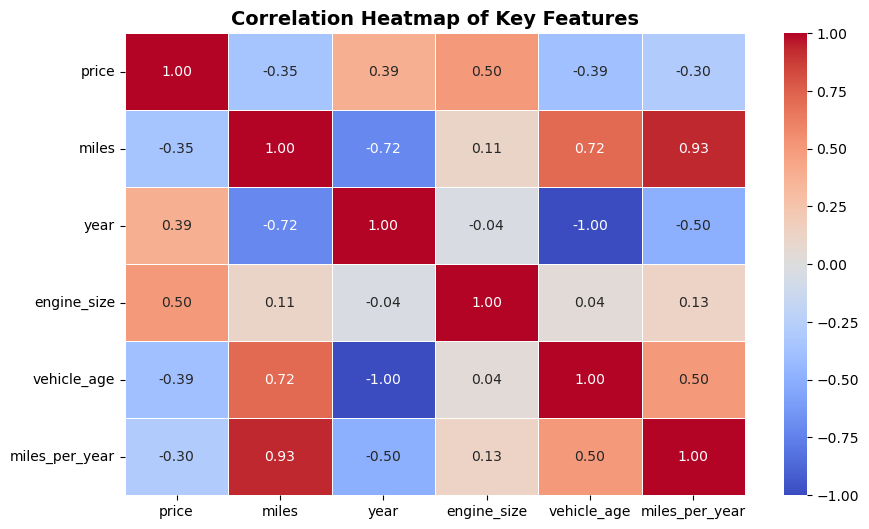

In [27]:

# Heatmap after feature engineering
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_after_fe, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Features", fontsize=14,fontweight='bold')
plt.show()

In [28]:
# Check number of listings per group
group_sizes = car_df.groupby(['make', 'model', 'year']).size()
print(group_sizes.describe()) 

count     3810.000000
mean      1482.824934
std       3550.364133
min          1.000000
25%         46.000000
50%        304.500000
75%       1373.750000
max      74149.000000
dtype: float64


In [54]:
# Shuffle data
car_df = car_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split sizes (e.g., 80% VData, 20% TData)
n = int(0.8 * len(car_df))

# Slice
TData = car_df[:n]  # Train Data
VData = car_df[n:]  # Validation Data

print(f"TData size: {len(TData)}, VData size: {len(VData)}")

TData size: 4519650, VData size: 1129913


In [55]:

# ---------------- Price Model 1 --------------------

# Fit model on TData
fmv_model_1 = smf.ols('log_price ~ log_miles + vehicle_age + engine_size + C(make) + C(segment) + C(fuel_category) + C(transmission) + C(drivetrain)', data=TData).fit()
print(fmv_model_1.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 3.393e+05
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:32:04   Log-Likelihood:             8.3011e+05
No. Observations:             4519650   AIC:                        -1.660e+06
Df Residuals:                 4519588   BIC:                        -1.659e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [56]:
# parameters of the model1
fmv_model_1.params

Intercept                  11.094303
C(make)[T.Alfa Romeo]       0.214971
C(make)[T.Aston Martin]     1.148749
C(make)[T.Audi]             0.246632
C(make)[T.BMW]              0.226719
                             ...    
C(drivetrain)[T.FWD]       -0.142607
C(drivetrain)[T.RWD]       -0.044205
log_miles                  -0.035885
vehicle_age                -0.111027
engine_size                 0.174170
Length: 62, dtype: float64

In [57]:
# extracting R-squared value for model1
fmv_model_1.rsquared

np.float64(0.8207792312044173)

In [58]:
#extracting adjusted R-squared value for model1
fmv_model_1.rsquared_adj

np.float64(0.8207768122965663)

In [59]:
# Predict on VData
VData['Predicted_log_price_1'] = fmv_model_1.predict(VData)
VData['predicted_price_fmv_model_1'] = np.expm1(VData['Predicted_log_price_1'])

/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/3469940328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VData['Predicted_log_price_1'] = fmv_model_1.predict(VData)
/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/3469940328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VData['predicted_price_fmv_model_1'] = np.expm1(VData['Predicted_log_price_1'])


In [60]:
# Evaluate
from statsmodels.tools.eval_measures import rmse
rmse_fmv_1 = rmse(VData['price'],VData['predicted_price_fmv_model_1'])
print(f"RMSE (Model 1): ${rmse_fmv_1:,.2f}")

RMSE (Model 1): $8,118.95


In [61]:
# ------------
# MODEL 2
# ------------

fmv_model_2 = smf.ols('log_price ~ vehicle_age + miles_per_year + engine_size + C(engine_block) + C(make) + C(segment) + C(fuel_category) + C(transmission)', data=TData).fit()
print(fmv_model_2.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 3.700e+05
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:36:04   Log-Likelihood:             9.9183e+05
No. Observations:             4519650   AIC:                        -1.984e+06
Df Residuals:                 4519588   BIC:                        -1.983e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [62]:
# rsquared value for model2
fmv_model_2.rsquared

np.float64(0.8331567405655199)

In [63]:
# adjusted rsquared value for model2
fmv_model_2.rsquared_adj

np.float64(0.8331544887145048)

In [64]:
# Predict on VData for model 2
VData['Predicted_log_price_2'] = fmv_model_2.predict(VData)
VData['predicted_price_fmv_model_2'] = np.expm1(VData['Predicted_log_price_2'])

/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/784898617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VData['Predicted_log_price_2'] = fmv_model_2.predict(VData)
/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/784898617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VData['predicted_price_fmv_model_2'] = np.expm1(VData['Predicted_log_price_2'])


In [65]:
# RMSE for Model 2
rmse_fmv_2 = rmse(VData['price'], VData['predicted_price_fmv_model_2'])
print(f"RMSE (Model 2): ${rmse_fmv_2:,.2f}")

RMSE (Model 2): $7,846.98


In [66]:
# Compare models
if rmse_fmv_2 < rmse_fmv_1:
    print("Model 2 performs better.")
else:
    print("Model 1 performs better.")

Model 2 performs better.


In [67]:
#residual calculation
VData['residual'] = VData['price'] - VData['predicted_price_fmv_model_2']

VData['residual_pct'] = VData['residual'] / VData['predicted_price_fmv_model_2'] * 100

/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/993867855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VData['residual'] = VData['price'] - VData['predicted_price_fmv_model_2']
/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/993867855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VData['residual_pct'] = VData['residual'] / VData['predicted_price_fmv_model_2'] * 100


In [68]:
#compute segment-wise std dev
segment_std = VData.groupby('segment')['residual_pct'].std().reset_index()
segment_std.rename(columns={'residual_pct': 'segment_residual_std'}, inplace=True)
VData = VData.merge(segment_std, on='segment', how='left')

In [69]:
#create trust flag
VData['trust_flag'] = (VData['residual_pct'].abs() <= 2 * VData['segment_residual_std']).astype(int)
print(VData['trust_flag'].value_counts())

trust_flag
1    1099299
0      30614
Name: count, dtype: int64


We removed the make variable from our regression models and kept segment to avoid multicollinearity. Segment provides broader market grouping, reduces model complexity, and ensures stable coefficient estimation.

In [70]:
# Fit logistic regression model to predict trust_flag
trust_model = smf.logit('trust_flag ~ vehicle_age +  engine_size + C(engine_block) + C(segment) + C(fuel_category) + C(transmission)', data=VData).fit()
print(trust_model.summary())

Optimization terminated successfully.
         Current function value: 0.117354
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             trust_flag   No. Observations:              1129913
Model:                          Logit   Df Residuals:                  1129896
Method:                           MLE   Df Model:                           16
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                 0.05733
Time:                        17:37:18   Log-Likelihood:            -1.3260e+05
converged:                       True   LL-Null:                   -1.4066e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.2858      0.523      2.459      0.014

In [71]:
# Predict trust scores
VData['trust_score'] = trust_model.predict(VData)
VData['pred_trust_flag'] = (VData['trust_score'] >= 0.5).astype(int)

In [72]:
# Evaluate trust model
trust_accuracy = (VData['trust_flag'] == VData['pred_trust_flag']).mean()
print(f"Trust Model Accuracy: {trust_accuracy:.2%}")

Trust Model Accuracy: 97.29%


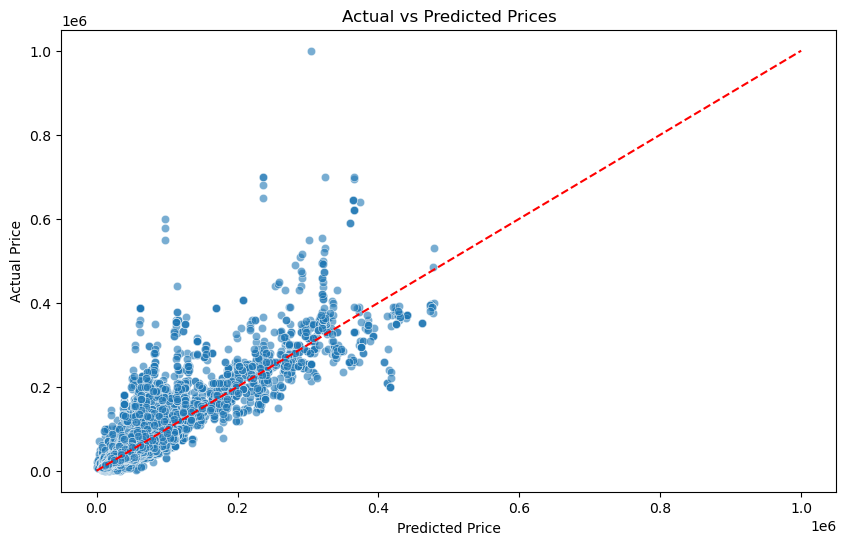

In [73]:
#scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted_price_fmv_model_2', y='price', data=VData, alpha=0.6)
plt.plot([VData['price'].min(), VData['price'].max()], 
         [VData['price'].min(), VData['price'].max()], 
         color='red', linestyle='--')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [74]:
# display trust scores
VData['trust_score'].head()

0    0.963667
1    0.972455
2    0.993096
3    0.966988
4    0.925906
Name: trust_score, dtype: float64

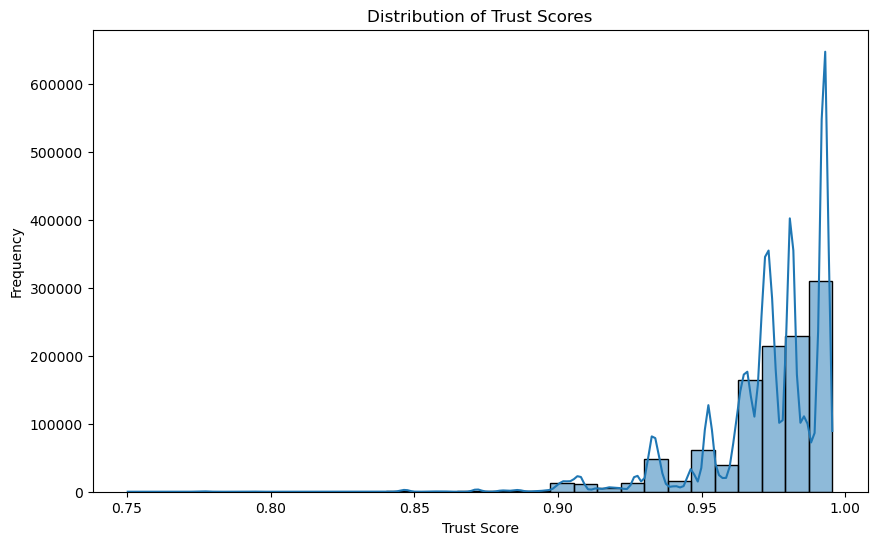

In [75]:
#trust score distribution
plt.figure(figsize=(10, 6))
sns.histplot(VData['trust_score'], bins=30, kde=True)
plt.title("Distribution of Trust Scores")
plt.xlabel("Trust Score")
plt.ylabel("Frequency")
plt.show()

We set the smoothing level to 0.8 and the smoothing slope to 0.2 in Holt’s linear trend model to give more weight to recent data points for the level (0.8), while allowing the trend (slope) to update more gradually (0.2).

/var/folders/ht/0h0bm19j1cz1ht72qblt4lzc0000gn/T/ipykernel_880/2477803634.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(price_by_year['price']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)


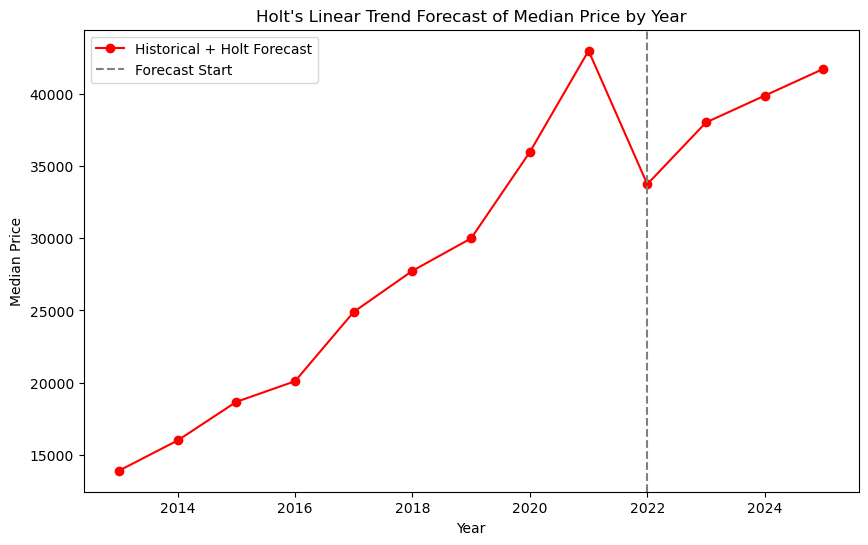

In [76]:
#Forecasting Price Trends by Year

#average median price by year
price_by_year = VData.groupby('year')['price'].median().reset_index()

# Holt-Winters Exponential Smoothing
from statsmodels.tsa.holtwinters import Holt
holt_model = Holt(price_by_year['price']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
holt_forecast = holt_model.forecast(steps=3)

year_all = np.arange(price_by_year['year'].min(), price_by_year['year'].max()+4)
price_all = np.concatenate([price_by_year['price'], holt_forecast])

plt.figure(figsize=(10, 6))
plt.plot(year_all, price_all, marker='o', color='red', label='Historical + Holt Forecast')
plt.axvline(x=price_by_year['year'].max(), color='gray', linestyle='--', label='Forecast Start')
plt.title("Holt's Linear Trend Forecast of Median Price by Year")
plt.xlabel("Year")
plt.ylabel("Median Price")
plt.legend()
plt.show()



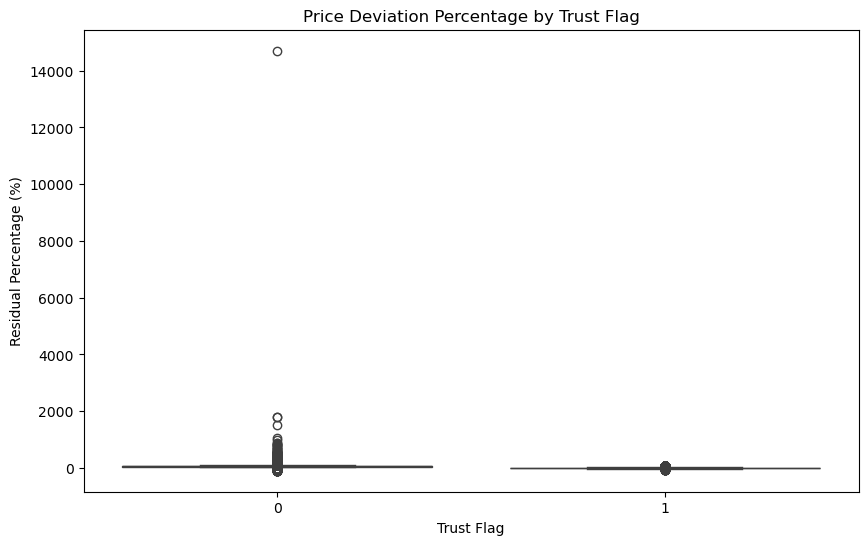

In [77]:
#price deviation vs Trust Flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='trust_flag', y='residual_pct', data=VData)
plt.title("Price Deviation Percentage by Trust Flag")
plt.xlabel("Trust Flag")
plt.ylabel("Residual Percentage (%)")
plt.show()

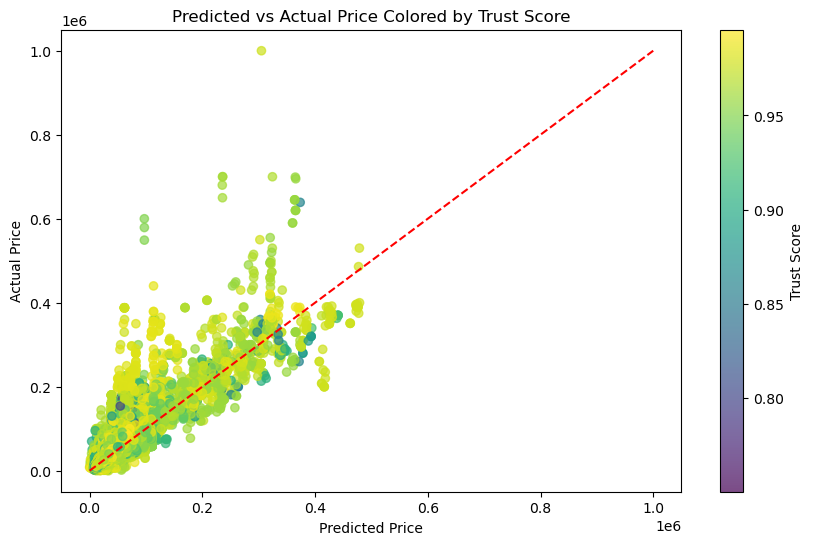

In [78]:
# Scatter plot: Predicted vs Actual price colored by trust score
plt.figure(figsize=(10, 6))

# Use matplotlib's scatter to create a mappable object
scatter = plt.scatter(
    x=VData['predicted_price_fmv_model_2'], 
    y=VData['price'], 
    c=VData['trust_score'], 
    cmap='viridis', 
    alpha=0.7
)

# Add a diagonal line for reference
plt.plot(
    [VData['price'].min(), VData['price'].max()], 
    [VData['price'].min(), VData['price'].max()], 
    color='red', linestyle='--'
)

# Add title and labels
plt.title("Predicted vs Actual Price Colored by Trust Score")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

# Add the colorbar
plt.colorbar(scatter, label='Trust Score')

# Show the plot
plt.show()